In [169]:
#What customers are most likely to buy in future
#http://www.awesomestats.in/python-recommending-movies/

    Some of the key techiques that recommendation systems use are

- Association Rules mining
- Collaborative Filtering
- Matrix Factorization
- Page Rank Algorithm




**    We will discuss Collaborative filtering techinque in this article.

**    Two most widely used Collaborative filtering techniques are

- User Similarity
- Item Similarity



In [170]:
# https://buildingrecommenders.wordpress.com/2015/11/16/overview-of-recommender-algorithms-part-1/
#http://blog.untrod.com/2016/06/simple-similar-products-recommendation-engine-in-python.html

In [171]:
import pandas as pd
import numpy as np

In [172]:
rating_df = pd.read_csv( "/home/vijay/DATA_SCIENCE/SC/SparkCourse/ml-100k/u.data", delimiter = "\t", header = None )

In [173]:
rating_df.head(5)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [174]:
rating_df.columns = ["userid", "movieid", "rating", "timestamp"]

In [175]:
rating_df.head( 10 )

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [176]:
print(len( rating_df.userid ))
print(len( rating_df.userid.unique() ))

100000
943


In [177]:
print(len( rating_df.movieid.unique() ))

1682


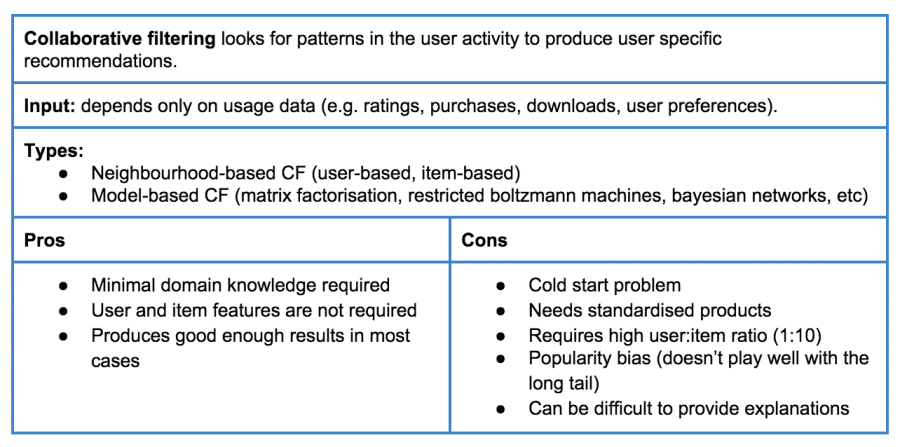

In [178]:
# Less users and number of  movies, ideal case for using collabrative filtering
from IPython.display import Image
Image(filename='collabrative.png') 

In [179]:
rating_df.drop( "timestamp", inplace = True, axis = 1 )

In [180]:
rating_df.head( 10 )

,userid,movieid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [181]:
movies_df = pd.read_csv( "/home/vijay/DATA_SCIENCE/SC/SparkCourse/ml-100k/u.item", delimiter = '\|', header = None )

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [182]:
movies_df = movies_df.iloc[:,:2] # all rows 2(0&1) column
movies_df.columns = ['movieid', 'title']

In [183]:
movies_df.head(3)

,movieid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [184]:
#Finding User Similarities
npa = np.array([3,7,4,1,56,77])
npa2 = np.array([1,7,6,2,50,70])

In [185]:
#print(pairwise_distances(npa))
cosine(npa,npa2)

0.00072168913510617383

In [186]:
test_Df =rating_df.head(10)
test_Df

,userid,movieid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


# how pivot n drop works
test_Df.pivot(index='userid',columns='movieid',values="rating").reset_index(drop=True)

Signature: pairwise_distances(X, Y=None, metric='euclidean', n_jobs=1, **kwds)
Docstring:
Compute the distance matrix from a vector array X and optional Y.

rating_df.pivot( index='userid', columns='movieid', values = "rating" ).reset_index(drop=True)[0:10]
# user id is now dropped and only row numbers remain, whihc are natural index
# so I have movie id and ratings

In [187]:
user_sim = 1 - pairwise_distances( test_Df.as_matrix(), metric="cosine" )

In [188]:
user_sim

array([[ 1.        ,  0.99172514,  0.81242602,  0.77507564,  0.97285609,
         0.9928647 ,  0.96341641,  0.98340043,  0.9962845 ,  0.81881646],
       [ 0.99172514,  1.        ,  0.8805567 ,  0.68754552,  0.99450785,
         0.99995659,  0.98985109,  0.99855636,  0.99908843,  0.88562467],
       [ 0.81242602,  0.8805567 ,  1.        ,  0.26128347,  0.9252731 ,
         0.87615287,  0.93897103,  0.90473227,  0.8595854 ,  0.9994191 ],
       [ 0.77507564,  0.68754552,  0.26128347,  1.        ,  0.60787456,
         0.69421144,  0.57737948,  0.6475581 ,  0.71783639,  0.27233051],
       [ 0.97285609,  0.99450785,  0.9252731 ,  0.60787456,  1.        ,
         0.99350827,  0.99927278,  0.99867853,  0.98916797,  0.92904877],
       [ 0.9928647 ,  0.99995659,  0.87615287,  0.69421144,  0.99350827,
         1.        ,  0.98849913,  0.99801626,  0.99944179,  0.88127364],
       [ 0.96341641,  0.98985109,  0.93897103,  0.57737948,  0.99927278,
         0.98849913,  1.        ,  0.99605215

In [189]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [190]:
#Create the pivot table
user_movies_df = rating_df.pivot( index='userid', columns='movieid', values = "rating" ).reset_index(drop=True)

In [191]:
user_movies_df.head(5)

movieid,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
#Fill '0' for ratings not given by users
user_movies_df.fillna( 0, inplace = True )

In [193]:
user_movies_df.shape

(943, 1682)

In [194]:
user_movies_df.iloc[10:20, 20:30]

movieid,21,22,23,24,25,26,27,28,29,30
10,0.0,4.0,0.0,3.0,3.0,0.0,0.0,5.0,3.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
12,3.0,4.0,5.0,1.0,1.0,0.0,3.0,5.0,2.0,0.0
13,0.0,3.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
15,0.0,5.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,5.0,4.0,0.0,3.0,4.0,0.0,3.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
#Calculate the distances
#Based on what users have given ratings to different items, we can calculate the distances between them.
#Less the distance more similar they are.

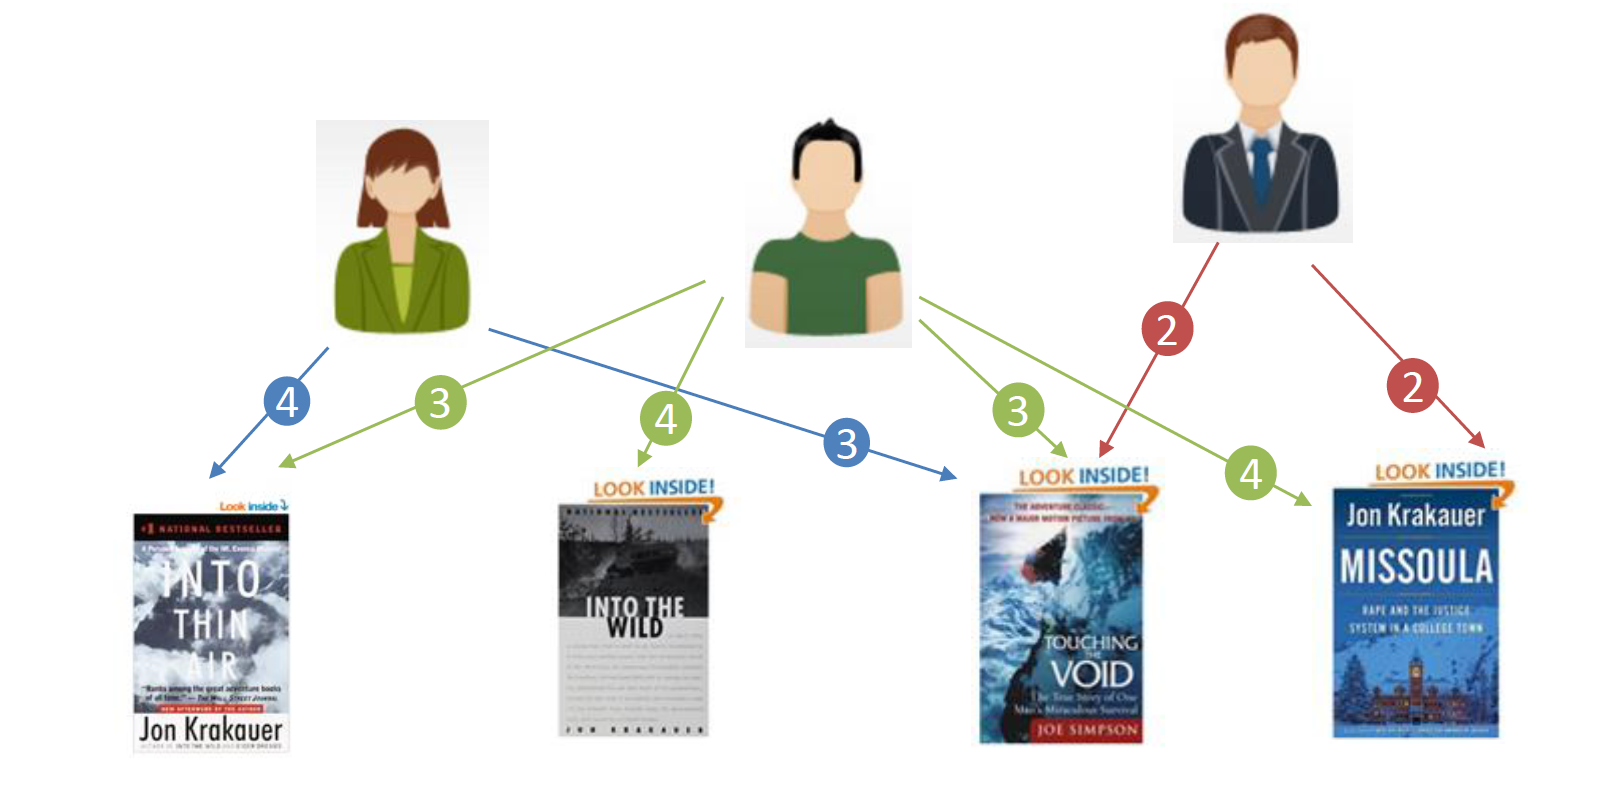

In [196]:
from IPython.display import Image
Image(filename='recomend-1.png') 

Now, we can find similar users based the distance between user depending on how they have rated the movies. The dimensions are the books and scale is the ratings users have provided.

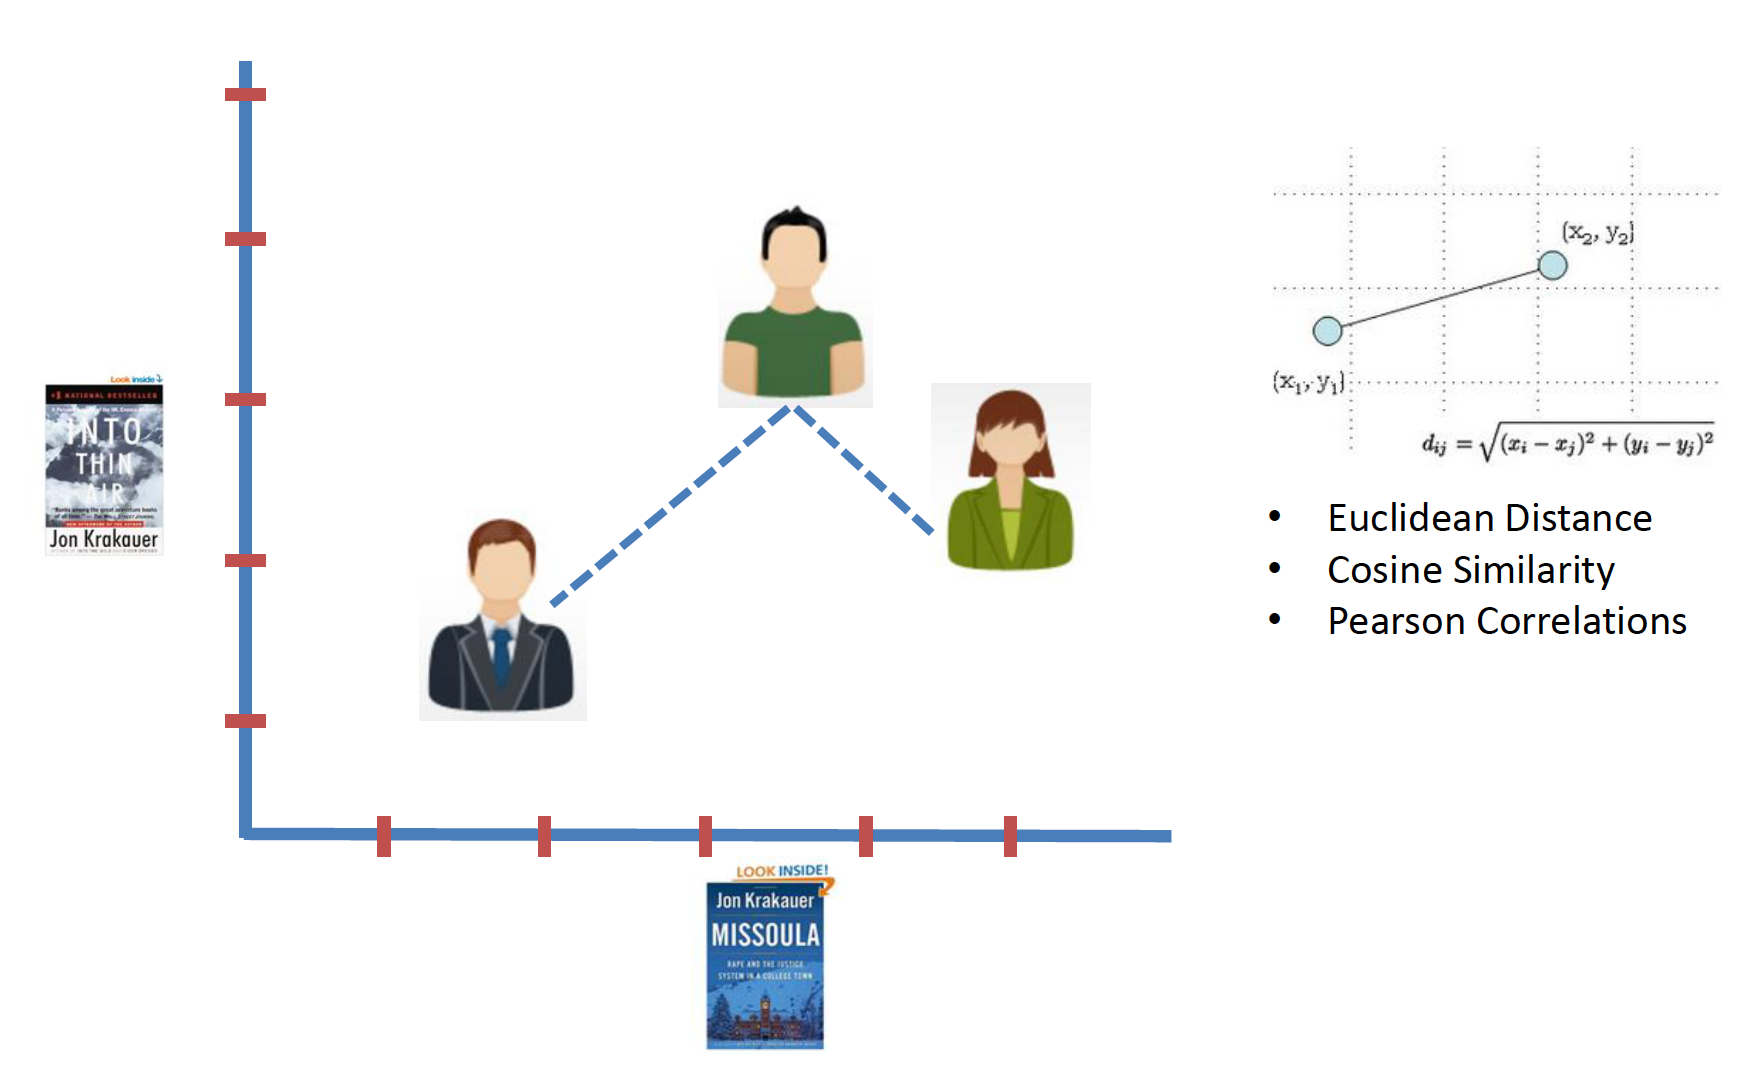

In [197]:
from IPython.display import Image
Image(filename='recomend-2.png') 

For calculating distances, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc

We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. But as the function gives us the distance, we will deduct it from 1

In [198]:
user_sim = 1 - pairwise_distances( user_movies_df.as_matrix(), metric="cosine" ) # as_matrix converts df to numpy

In [199]:
#pairwise_distances? 

In [200]:
user_sim_df = pd.DataFrame( user_sim )

In [201]:
user_sim_df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


In [130]:
#Who is similar to who?
#Users with highest similarity values can be treated as similar users.
user_sim_df.idxmax(axis=1)[0:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

The above results show that user are most similar to themselves. But this is not what we want. So, we will fill the diagonal of the matrix (which represent the relationship with self) with 0.

In [202]:
#Setting correlation with self to 0
np.fill_diagonal( user_sim, 0 )

In [203]:
user_sim_df = pd.DataFrame( user_sim )

In [204]:
user_sim_df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,0.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,0.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,0.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,0.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


#Finding user similarities
test_Df = user_sim_df[0:10]
test_Df

user_sim_df.idxmax(axis=1).sample

In [205]:
#Finding user similarities
user_sim_df.idxmax(axis=1).sample( 10, random_state = 10 ) # slice axis 1 all columns one row ,axis 0 one column all rows

544    756
309    246
448    893
628    537
284    413
572    693
225    866
567    311
75     176
726    496
dtype: int64

This shows which results are similar to each other. The actual user id will be the index number + 1. That means user 545 is similar to user 757 and so on and so forth. as these are natural index and not user id

In [62]:
#Movies similar users like or dislike

In [64]:
def get_user_similar_movies( user1, user2 ):
    common_movies = rating_df[rating_df.userid == user1].merge(
    rating_df[rating_df.userid == user2],
    on = "movieid",
    how = "inner" )

    return common_movies.merge( movies_df, on = 'movieid' )

In [65]:
#User 310 Vs. User 247

In [66]:
get_user_similar_movies( 310, 247 )

,userid_x,movieid,rating_x,userid_y,rating_y,title
0,310,258,3,247,5,Contact (1997)
1,310,257,5,247,4,Men in Black (1997)
2,310,251,5,247,4,Shall We Dance? (1996)
3,310,1022,5,247,4,"Fast, Cheap & Out of Control (1997)"
4,310,222,3,247,3,Star Trek: First Contact (1996)
5,310,181,4,247,4,Return of the Jedi (1983)
6,310,50,5,247,5,Star Wars (1977)


In [67]:
#Challenges with User similarity


**The challenge with calculating user similarity is the user need to have some prior purchases and should have rated them. This recommendation technique does not work for new users. The system need to wait until the user make some purchases and rates them. Only then similar users can be found and recommendations can be made. This is called cold start problem.

**This can be avoided by calculating item similarities based how how users are buying these items and rates them together. Here the items are entities and users are dimensions.


In [68]:
#Finding Item Similarity

In [206]:
rating_mat = rating_df.pivot( index='movieid', columns='userid', values = "rating" ).reset_index(drop=True)

In [207]:
rating_mat.fillna( 0, inplace = True )

In [208]:
rating_mat.shape

(1682, 943)

In [209]:
rating_mat.head( 10 )

userid,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
8,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0
9,3.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
movie_sim = 1 - pairwise_distances( rating_mat.as_matrix(), metric="correlation" )

In [211]:
movie_sim.shape

(1682, 1682)

In [212]:
movie_sim_df = pd.DataFrame( movie_sim )

In [213]:
movie_sim_df.head( 10 )

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
1,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
2,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
3,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
4,0.128840,0.240712,0.141368,0.237298,1.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
5,0.015113,0.030062,0.065347,0.021878,-0.008594,1.000000,0.054415,0.012330,0.079619,0.166084,...,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159,-0.005159
6,0.347354,0.220022,0.258855,0.295489,0.205289,0.054415,1.000000,0.190670,0.286572,0.178505,...,-0.026036,0.039920,-0.026036,-0.026036,0.039920,-0.026036,-0.026036,-0.026036,0.039920,0.039920
7,0.254490,0.206020,0.078636,0.352800,0.145866,0.012330,0.190670,1.000000,0.229331,0.152679,...,-0.017230,0.075617,0.057047,0.057047,0.075617,-0.017230,-0.017230,-0.017230,0.075617,-0.017230
8,0.209502,0.077894,0.146181,0.229922,0.142541,0.079619,0.286572,0.229331,1.000000,0.158373,...,-0.021125,-0.021125,0.047273,0.047273,0.064372,-0.021125,-0.021125,-0.021125,0.047273,0.064372
9,0.104655,0.072906,0.079608,0.138220,-0.033746,0.166084,0.178505,0.152679,0.158373,1.000000,...,-0.010138,-0.010138,0.073967,0.073967,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138,-0.010138


#movie_sim_df.iloc[0]
test_Df

test_Df.iloc[0]

In [223]:
#Finding similar movies to "Toy Story"
movies_df['similarity'] = movie_sim_df.iloc[0] # just returns the first row
movies_df.columns = ['movieid', 'title', 'similarity']

In [224]:
movies_df.head( 10 )

,movieid,title,similarity
0,1,Toy Story (1995),1.000000
1,2,GoldenEye (1995),0.234595
2,3,Four Rooms (1995),0.193362
3,4,Get Shorty (1995),0.226213
4,5,Copycat (1995),0.128840
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0.015113
6,7,Twelve Monkeys (1995),0.347354
7,8,Babe (1995),0.254490
8,9,Dead Man Walking (1995),0.209502
9,10,Richard III (1995),0.104655


In [225]:
movies_df.sort_values( ["similarity"], ascending = False )[1:10]

,movieid,title,similarity
49,50,Star Wars (1977),0.457677
120,121,Independence Day (ID4) (1996),0.454544
116,117,"Rock, The (1996)",0.431789
150,151,Willy Wonka and the Chocolate Factory (1971),0.423975
180,181,Return of the Jedi (1983),0.422991
404,405,Mission: Impossible (1996),0.416770
94,95,Aladdin (1992),0.407829
117,118,Twister (1996),0.404908
221,222,Star Trek: First Contact (1996),0.391073


## That means anyone who buys Toy Story and likes it, the top 3 movies that can be recommender to him or her are Star Wars (1977), Independence Day (ID4) (1996) and Rock, The (1996)

In [81]:
#Utility function to find similar movie
def get_similar_movies( movieid, topN = 5 ):
    movies_df['similarity'] = movie_sim_df.iloc[movieid -1]
    top_n = movies_df.sort_values( ["similarity"], ascending = False )[0:topN]
    print( "Similar Movies to: ", )
    return top_n

In [82]:
#Similar movies to Twister
get_similar_movies( 118 )

Similar Movies to: 


,movieid,title,similarity
117,118,Twister (1996),1.000000
120,121,Independence Day (ID4) (1996),0.629867
404,405,Mission: Impossible (1996),0.542379
545,546,Broken Arrow (1996),0.509549
596,597,Eraser (1996),0.489693


In [84]:
#Similar movies to The Godfather
get_similar_movies( 127, 10 )


Similar Movies to: 


,movieid,title,similarity
126,127,"Godfather, The (1972)",1.000000
186,187,"Godfather: Part II, The (1974)",0.543335
49,50,Star Wars (1977),0.409379
181,182,GoodFellas (1990),0.396741
22,23,Taxi Driver (1976),0.369608
99,100,Fargo (1996),0.345218
179,180,Apocalypse Now (1979),0.334691
191,192,Raging Bull (1980),0.331378
356,357,One Flew Over the Cuckoo's Nest (1975),0.331135
233,234,Jaws (1975),0.325565


In [85]:
#Similar movies to The Lion King
get_similar_movies( 71 )

Similar Movies to: 


,movieid,title,similarity
70,71,"Lion King, The (1994)",1.000000
94,95,Aladdin (1992),0.683855
587,588,Beauty and the Beast (1991),0.605291
68,69,Forrest Gump (1994),0.572755
81,82,Jurassic Park (1993),0.557333



The item similarity has been able to find out the movies that can be recommended. And these recommendations look appropriate.